In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import yfinance as yf

In [43]:
vix_df = yf.download("^VIX", start="2011-05-02", end="2022-09-09")

[*********************100%***********************]  1 of 1 completed


In [46]:
vix_df = vix_df["Close"]

In [4]:
gex_df = pd.read_csv("DIX (2).csv", parse_dates=True, infer_datetime_format=True, index_col="date")

In [5]:
gex_df

,price,dix,gex
date,,,
2011-05-02,1361.219971,0.378842,1.897313e+09
2011-05-03,1356.619995,0.383411,1.859731e+09
2011-05-04,1347.319946,0.392122,1.717764e+09
2011-05-05,1335.099976,0.405457,1.361864e+09
2011-05-06,1340.199951,0.418649,1.490329e+09
...,...,...,...
2022-09-02,3924.260010,0.485670,-1.869357e+09
2022-09-06,3908.189941,0.463983,-2.050652e+09
2022-09-07,3979.870117,0.460074,-5.270892e+08


In [34]:
spx_change = gex_df["price"].pct_change()* 100

In [35]:
gex_df["SPX Change"] = spx_change

In [36]:
gex_df

,price,dix,gex,SPX Change
date,,,,
2011-05-02,1361.219971,0.378842,1.897313e+09,NaN
2011-05-03,1356.619995,0.383411,1.859731e+09,-0.337930
2011-05-04,1347.319946,0.392122,1.717764e+09,-0.685531
2011-05-05,1335.099976,0.405457,1.361864e+09,-0.906984
2011-05-06,1340.199951,0.418649,1.490329e+09,0.381992
...,...,...,...,...
2022-09-02,3924.260010,0.485670,-1.869357e+09,-1.073650
2022-09-06,3908.189941,0.463983,-2.050652e+09,-0.409506
2022-09-07,3979.870117,0.460074,-5.270892e+08,1.834102


##### gex_df.plot(kind= "scatter", x = "gex", y = "SPX Change",cmap = 'Spectral', edgecolor = 'k')

In [97]:
colors = np.where(gex_df["SPX Change"] <0, 'C0', 'C1')

Text(0.5, 1.0, 'SPX Change by GEX level')

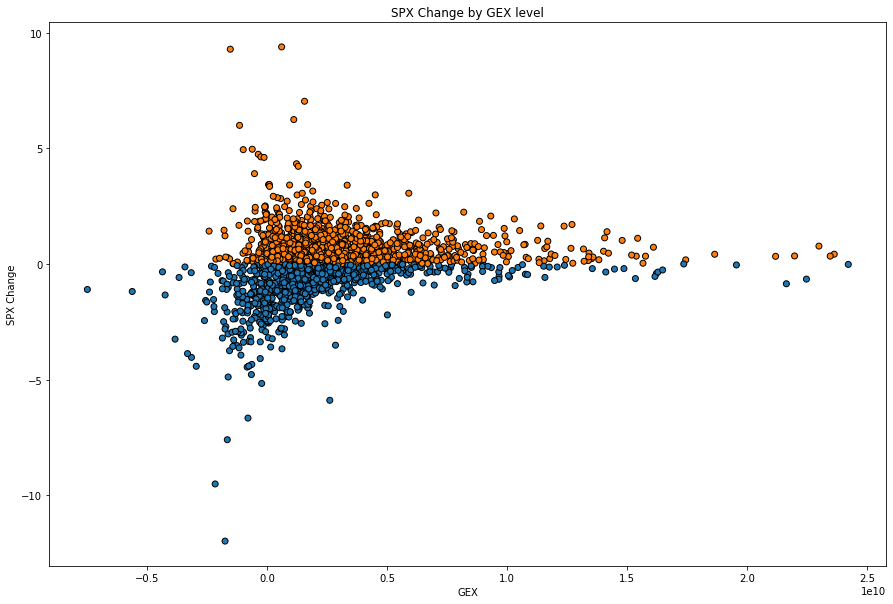

In [103]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
plt.scatter(x = gex_df["gex"], y = gex_df["SPX Change"],cmap = 'Spectral', edgecolor = 'k', c= colors)
plt.xlabel("GEX")
plt.ylabel("SPX Change")
plt.title("SPX Change by GEX level")

<AxesSubplot:xlabel='gex', ylabel='SPX Change'>

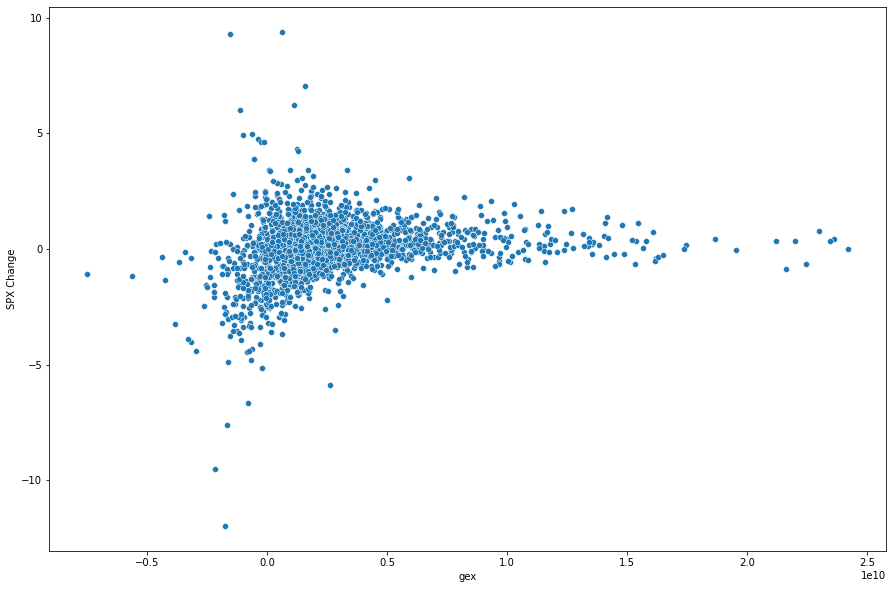

In [39]:
sns.scatterplot(data= gex_df, x = "gex", y ="SPX Change")

In [48]:
vix_gex_df = pd.concat([gex_df, vix_df], axis=1)

In [52]:
vix_gex_df.rename({"Close": "VIX"}, axis=1, inplace=True)

In [53]:
vix_gex_df

,price,dix,gex,SPX Change,VIX
2011-05-02,1361.219971,0.378842,1.897313e+09,NaN,15.990000
2011-05-03,1356.619995,0.383411,1.859731e+09,-0.337930,16.700001
2011-05-04,1347.319946,0.392122,1.717764e+09,-0.685531,17.080000
2011-05-05,1335.099976,0.405457,1.361864e+09,-0.906984,18.200001
2011-05-06,1340.199951,0.418649,1.490329e+09,0.381992,18.400000
...,...,...,...,...,...
2022-09-02,3924.260010,0.485670,-1.869357e+09,-1.073650,25.469999
2022-09-06,3908.189941,0.463983,-2.050652e+09,-0.409506,26.910000
2022-09-07,3979.870117,0.460074,-5.270892e+08,1.834102,24.639999
2022-09-08,4006.179932,0.478798,6.573947e+08,0.661072,23.610001


In [54]:
implied_move = vix_gex_df["VIX"] / 16

In [56]:
vix_gex_df["Implied Move"] = implied_move

In [57]:
vix_gex_df

,price,dix,gex,SPX Change,VIX,Implied Move
2011-05-02,1361.219971,0.378842,1.897313e+09,NaN,15.990000,0.999375
2011-05-03,1356.619995,0.383411,1.859731e+09,-0.337930,16.700001,1.043750
2011-05-04,1347.319946,0.392122,1.717764e+09,-0.685531,17.080000,1.067500
2011-05-05,1335.099976,0.405457,1.361864e+09,-0.906984,18.200001,1.137500
2011-05-06,1340.199951,0.418649,1.490329e+09,0.381992,18.400000,1.150000
...,...,...,...,...,...,...
2022-09-02,3924.260010,0.485670,-1.869357e+09,-1.073650,25.469999,1.591875
2022-09-06,3908.189941,0.463983,-2.050652e+09,-0.409506,26.910000,1.681875
2022-09-07,3979.870117,0.460074,-5.270892e+08,1.834102,24.639999,1.540000
2022-09-08,4006.179932,0.478798,6.573947e+08,0.661072,23.610001,1.475625


In [59]:
spx_absolute_move = vix_gex_df["SPX Change"].abs()

In [70]:
vix_gex_df["Actual Move SPX"] = spx_absolute_move

In [71]:
vix_gex_df

,price,dix,gex,SPX Change,VIX,Implied Move,Absolute Move SPX,SPX VIX,Actual Move SPX
2011-05-02,1361.219971,0.378842,1.897313e+09,NaN,15.990000,0.999375,NaN,NaN,NaN
2011-05-03,1356.619995,0.383411,1.859731e+09,-0.337930,16.700001,1.043750,0.337930,-0.705820,0.337930
2011-05-04,1347.319946,0.392122,1.717764e+09,-0.685531,17.080000,1.067500,0.685531,-0.381969,0.685531
2011-05-05,1335.099976,0.405457,1.361864e+09,-0.906984,18.200001,1.137500,0.906984,-0.230517,0.906984
2011-05-06,1340.199951,0.418649,1.490329e+09,0.381992,18.400000,1.150000,0.381992,-0.768008,0.381992
...,...,...,...,...,...,...,...,...,...
2022-09-02,3924.260010,0.485670,-1.869357e+09,-1.073650,25.469999,1.591875,1.073650,-0.518225,1.073650
2022-09-06,3908.189941,0.463983,-2.050652e+09,-0.409506,26.910000,1.681875,0.409506,-1.272369,0.409506
2022-09-07,3979.870117,0.460074,-5.270892e+08,1.834102,24.639999,1.540000,1.834102,0.294102,1.834102
2022-09-08,4006.179932,0.478798,6.573947e+08,0.661072,23.610001,1.475625,0.661072,-0.814553,0.661072


In [72]:
absolute_move_vix = vix_gex_df["Actual Move SPX"] - vix_gex_df["Implied Move"]

In [73]:
vix_gex_df["SPX VIX"] = absolute_move_vix

In [74]:
vix_gex_df

,price,dix,gex,SPX Change,VIX,Implied Move,Absolute Move SPX,SPX VIX,Actual Move SPX
2011-05-02,1361.219971,0.378842,1.897313e+09,NaN,15.990000,0.999375,NaN,NaN,NaN
2011-05-03,1356.619995,0.383411,1.859731e+09,-0.337930,16.700001,1.043750,0.337930,-0.705820,0.337930
2011-05-04,1347.319946,0.392122,1.717764e+09,-0.685531,17.080000,1.067500,0.685531,-0.381969,0.685531
2011-05-05,1335.099976,0.405457,1.361864e+09,-0.906984,18.200001,1.137500,0.906984,-0.230517,0.906984
2011-05-06,1340.199951,0.418649,1.490329e+09,0.381992,18.400000,1.150000,0.381992,-0.768008,0.381992
...,...,...,...,...,...,...,...,...,...
2022-09-02,3924.260010,0.485670,-1.869357e+09,-1.073650,25.469999,1.591875,1.073650,-0.518225,1.073650
2022-09-06,3908.189941,0.463983,-2.050652e+09,-0.409506,26.910000,1.681875,0.409506,-1.272369,0.409506
2022-09-07,3979.870117,0.460074,-5.270892e+08,1.834102,24.639999,1.540000,1.834102,0.294102,1.834102
2022-09-08,4006.179932,0.478798,6.573947e+08,0.661072,23.610001,1.475625,0.661072,-0.814553,0.661072


In [75]:
vix_gex_df["SPX VIX"].mean()

-0.41505132087703384

<AxesSubplot:>

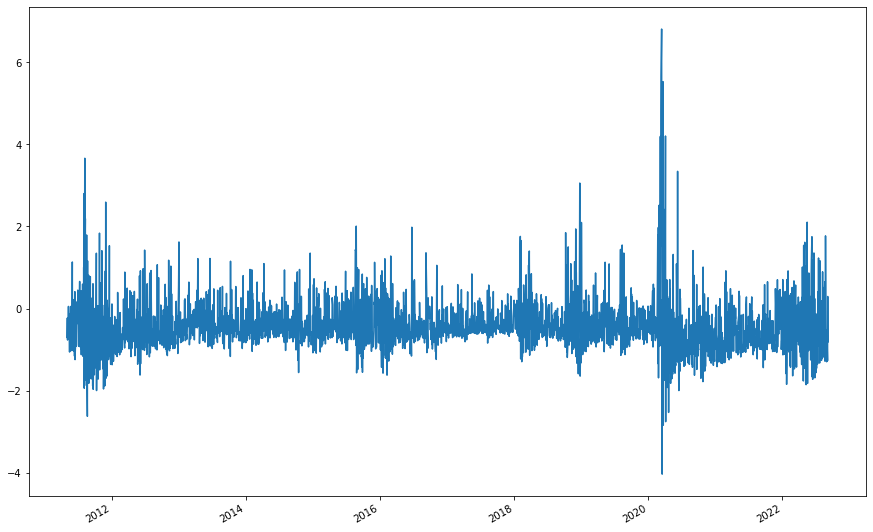

In [76]:
vix_gex_df["SPX VIX"].plot()

<AxesSubplot:>

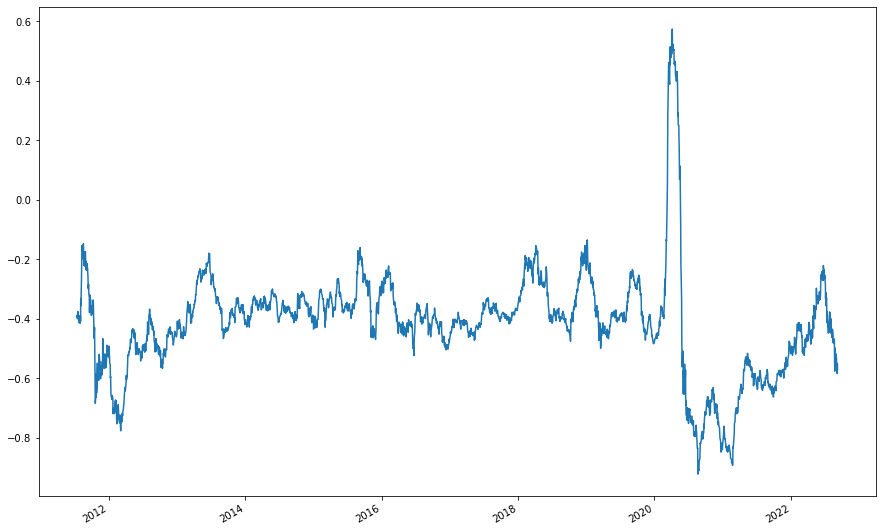

In [84]:
vix_gex_df["SPX VIX"].rolling(window=50).mean().plot()